In [4]:
! poetry install

Installing dependencies from lock file

No dependencies to install or update

Installing the current project: dialogue2graph (0.1.0)


## Generate synthetic data on a given topic

Use `LoopedGraphGenerator` to create a validated graph from several LLM generated dialogues concerning a given topic

In [ ]:
from dotenv import load_dotenv
from dialogue2graph.datasets.complex_dialogues.generation import LoopedGraphGenerator
from dialogue2graph import Graph
from dialogue2graph.pipelines.model_storage import ModelStorage

load_dotenv()

True

1. Create `ModelStorage` instance and add choosen LLMs for dialogue generation, dialogue validation, theme validation and cycle end search.

In [ ]:
model_storage = ModelStorage()
model_storage.add(
    "gen_model",  # model to use for generation
    config={"name": "o1-mini"},
    model_type="llm",
)
model_storage.add(
    "help_model",  # model to use for other tasks
    config={"name": "gpt-3.5-turbo"},
    model_type="llm",
)

INFO:dialogue2graph.pipelines.model_storage:Added llm model 'gen_model' to storage
INFO:dialogue2graph.pipelines.model_storage:Added llm model 'help_model' to storage


2. Create `LoopedGraphGenerator` and use `invoke` method to get a dialogue graph

In [7]:
gen = LoopedGraphGenerator(
    model_storage=model_storage,
    generation_llm="gen_model",
    validation_llm="help_model",
    cycle_ends_llm="help_model",
    theme_validation_llm="help_model",
)

In [5]:
generated_graph = gen.invoke(topic="travel booking")

INFO:dialogue2graph.datasets.complex_dialogues.generation:Generating Graph ...



Generating graph for topic: travel booking


INFO:httpx:HTTP Request: POST http://193.187.173.33:8002/api/providers/openai/v1/chat/completions "HTTP/1.1 200 OK"
INFO:dialogue2graph.datasets.complex_dialogues.generation:🔍 Checking graph requirements...
INFO:dialogue2graph.datasets.complex_dialogues.generation:🔄 Found 4 cycles in the graph:
INFO:dialogue2graph.datasets.complex_dialogues.generation:Cycle 1: 1 -> 2 -> 1
INFO:dialogue2graph.datasets.complex_dialogues.generation:Cycle 2: 2 -> 3 -> 2
INFO:dialogue2graph.datasets.complex_dialogues.generation:Cycle 3: 3 -> 4 -> 3
INFO:dialogue2graph.datasets.complex_dialogues.generation:Cycle 4: 4 -> 5 -> 4
INFO:dialogue2graph.datasets.complex_dialogues.generation:✅ Graph meets cycle requirements
INFO:dialogue2graph.datasets.complex_dialogues.generation:Sampling dialogues...
INFO:dialogue2graph.datasets.complex_dialogues.generation:Sampled 10 dialogues


1 repeats works!


INFO:httpx:HTTP Request: POST http://193.187.173.33:8002/api/providers/openai/v1/chat/completions "HTTP/1.1 200 OK"
INFO:dialogue2graph.datasets.complex_dialogues.generation:Validating and fixing transitions...
INFO:dialogue2graph.datasets.complex_dialogues.generation:Validating initial graph
INFO:httpx:HTTP Request: POST http://193.187.173.33:8002/api/providers/openai/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST http://193.187.173.33:8002/api/providers/openai/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST http://193.187.173.33:8002/api/providers/openai/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST http://193.187.173.33:8002/api/providers/openai/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST http://193.187.173.33:8002/api/providers/openai/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST http://193.187.173.33:8002/api/providers/openai/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx

3. Save result as a `Graph` instance and visualise it

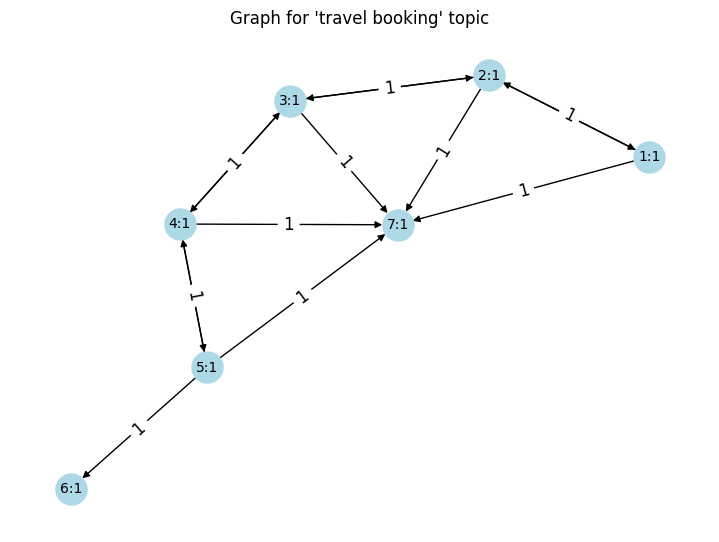

In [6]:
graph = Graph(generated_graph[0]["graph"])
graph.visualise_short("Graph for 'travel booking' topic")

4. Visualise dialogues using `RecursiveDialogueSampler`

In [7]:
from dialogue2graph.pipelines.core.dialogue_sampling import RecursiveDialogueSampler

sampler = RecursiveDialogueSampler()
dialogues = sampler.invoke(graph=graph, upper_limit=10)

1 repeats works!


**Example of generated dialogue**

In [8]:
print(dialogues[0])

assistant: Welcome to Travel Booker! Where would you like to travel?
user: I want to go to Paris
assistant: Great choice! What dates are you planning to travel?
user: From June 1 to June 10
assistant: How many travelers will be going on this trip?
user: There will be 2 of us
assistant: Do you prefer economy or business class?
user: I prefer business class
assistant: Here is a summary of your trip: Destination: [destination], Dates: [dates], Travelers: [number], Class: [preference]. Would you like to confirm?
user: I want to change my class preference
assistant: Do you prefer economy or business class?
